In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import xarray as xr

import proplot as pplt

In [2]:
nsamp = 100000 

## testing updated numbers
mu_po =  -0.511
sig_po = 0.231
mu_pf =  -0.371
sig_pf = 0.231

# ## Student's t dist
student = False
df_t = 5-1
Dlamb_pattern = stats.t.rvs(df_t,mu_po,sig_po,nsamp)
Dlamb_pattern_2u = stats.t.rvs(df_t,mu_po,2*sig_po,nsamp)
Dlamb_patternfull = stats.t.rvs(df_t,mu_pf,sig_pf,nsamp)
Dlamb_patternfull_2u = stats.t.rvs(df_t,mu_pf,2*sig_pf,nsamp)

In [3]:
# Unchanged; reproducing Sherwood likelihood function

def plio_sher_likelihood(lambd,F2x,transfer,ppm,ch4_fac,scalefac):

    # Shift to 3.9
    
    DT_o = 3.
    DT_sd = 1.
    
    lam = lambd/(1+transfer)

    DT = (np.log(ppm/284)/np.log(2) * (1+ch4_fac) * F2x * (1+scalefac) ) / lam

    likelihood = stats.norm.pdf(DT_o,DT,DT_sd)

    #fix any NaNs which are due to no roots = unbounded temp change

    # likelihood[is.nan(likelihood)] = 0.
    likelihood = np.where(np.isnan(likelihood),0,likelihood)
    
    return(likelihood)

In [4]:
# Unchanged; reproducing Sherwood likelihood function

def plio_sher_likelihood_new(lambd,F2x,transfer,ppm,ch4_fac,scalefac):

    # Shift to 3.9 according to newest proxy DA estimate (Annan et al. 2024)
    
    DT_o = 3.9
    DT_sd = 1.1
    
    lam = lambd/(1+transfer)

    DT = (np.log(ppm/284)/np.log(2) * (1+ch4_fac) * F2x * (1+scalefac) ) / lam

    likelihood = stats.norm.pdf(DT_o,DT,DT_sd)

    #fix any NaNs which are due to no roots = unbounded temp change

    # likelihood[is.nan(likelihood)] = 0.
    likelihood = np.where(np.isnan(likelihood),0,likelihood)
    
    return(likelihood)

In [7]:
def plio_MD_likelihood_new(lambd,F2x,transfer,ppm,ch4_fac,scalefac):

    DT_o = 3.9
    DT_sd = 1.1
    
    lam = lambd/(1+transfer)

    DT = (np.log(ppm/284)/np.log(2) * (1+ch4_fac) * F2x * (1+scalefac) + 0.5) / lam # increase total forcing to account
    # for your increased estimate of BC forcing. GHG is similar.

    likelihood = stats.norm.pdf(DT_o,DT,DT_sd)

    #fix any NaNs which are due to no roots = unbounded temp change

    # likelihood[is.nan(likelihood)] = 0.
    likelihood = np.where(np.isnan(likelihood),0,likelihood)
    
    return(likelihood)

In [8]:
def plio_MD_pattern_new(lambd,lam_pattern,F2x,transfer,ppm,ch4_fac,scalefac):

    DT_o = 3.9
    DT_sd = 1.1

    lam = lambd/(1+transfer) + lam_pattern

    DT = (np.log(ppm/284)/np.log(2) * (1+ch4_fac) * F2x * (1+scalefac) + 0.5) / lam 

    likelihood = stats.norm.pdf(DT_o,DT,DT_sd)

    #fix any NaNs which are due to no roots = unbounded temp change

    # likelihood[is.nan(likelihood)] = 0.
    likelihood = np.where(np.isnan(likelihood),0,likelihood)
    
    return(likelihood)

In [10]:
#this is the new value correcting for land surface warming
F2x = stats.norm.rvs(4.0, 0.3, nsamp)

#this is the uncertain transfer function between the paleo true equilibrium
#and the regression value that we target
#implemented as trueish = regression * (1+transfer) based on Maria's work
#trying Kyle's newer analysis based on more models

transfer = stats.norm.rvs(0.06,.2, nsamp)

In [11]:
def rnorm(ns,mean,sd):
    tmp = stats.norm.rvs(mean,sd,ns)
    return(tmp)

In [12]:
#shared parameters
S = stats.uniform.rvs(0,11,nsamp)
#pars for paleo hot
#ppm CO2
ppm = rnorm(nsamp,mean=375,sd=25)

#CH4 scale-up

#Gavin's factor of 1.4 as in his comments (accounting also for N2O)

ch4_fac = rnorm(nsamp,mean=0.4,sd=0.1)

#ESS scale-up

scalefac = stats.norm.rvs(0.5, 0.25, nsamp)

In [13]:
# my estimates

F_plio = rnorm(nsamp,mean=3.83,sd=0.25)

In [14]:
wt_plio = plio_sher_likelihood(F2x/S,F2x,transfer,ppm,ch4_fac,scalefac)

wt_plio = wt_plio / np.sum(wt_plio) #sum to unity to make proper weights

print("effective ensemble size based on paleo_hot",1/np.sum(wt_plio**2))

effective ensemble size based on paleo_hot 4010560.6633331226


In [1]:
wt_plio0 = plio_sher_likelihood(F2x/S,F2x,transfer,ppm,ch4_fac,scalefac)
wt_plio0 = wt_plio0 / np.sum(wt_plio0) 
wt_plio1 = plio_sher_likelihood_new(F2x/S,F2x,transfer,ppm,ch4_fac,scalefac)
wt_plio1 = wt_plio1 / np.sum(wt_plio1) 

wt_plio2 = plio_MD_likelihood_new(F2x/S,F2x,transfer,ppm,ch4_fac,scalefac)
wt_plio2 = wt_plio2 / np.sum(wt_plio2) 

#wt_plio3 = plio_sher_pattern_new(F2x/S,-0.4,F2x,transfer,ppm,ch4_fac,scalefac)
#wt_plio3 = wt_plio3 / np.sum(wt_plio3) 

wt_plio4 = plio_MD_pattern_new(F2x/S,-0.4,F2x,transfer,ppm,ch4_fac,scalefac)
wt_plio4 = wt_plio4 / np.sum(wt_plio4) 

NameError: name 'plio_sher_likelihood' is not defined

Create the ensemble for ESS

In [17]:
xin = np.linspace(0.01,10.23,512)

In [18]:
x0 = stats.gaussian_kde(S,weights=wt_plio0, bw_method=0.1).evaluate(xin)
x1 = stats.gaussian_kde(S,weights=wt_plio1, bw_method=0.1).evaluate(xin)
x2 = stats.gaussian_kde(S,weights=wt_plio2, bw_method=0.1).evaluate(xin)
#x3 = stats.gaussian_kde(S,weights=wt_plio3, bw_method=0.1).evaluate(xin)
x4 = stats.gaussian_kde(S,weights=wt_plio4, bw_method=0.1).evaluate(xin)

In [20]:
np.std(x1)

0.06014254579016863

In [22]:
x0 = x0/np.max(x0)
x1 = x1/np.max(x1)
x2 = x2/np.max(x2)
#x3 = x3/np.max(x3)
x4 = x4/np.max(x4)

In [23]:
y = np.linspace(0,1,512)

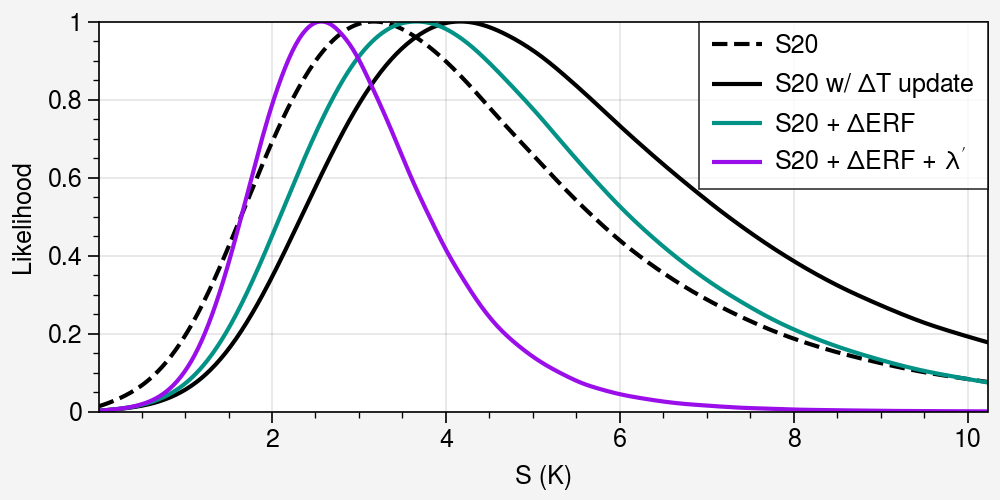

In [26]:
fig, ax = pplt.subplots(figsize=(5,2.5))

ax.plot(xin, x0, color='black', label = 'S20', linestyle='dashed')
ax.plot(xin, x1, color='black', label = 'S20 w/ $\Delta{T}$ update')
ax.plot(xin, x2, color='teal', label='S20 + $\Delta{ERF}$')
ax.plot(xin, x4, color='violet', label="S20 + $\Delta{ERF}$ + $\lambda{'}$")

ax.format(ylim = (0,1), ylabel='Likelihood', xlabel='S (K)')
ax.legend(ncols=1, fontsize=6.5)

plt.savefig('/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/figures/Sher_sensitivity_revised.pdf');

In [ ]:
# Notes.
## Revised S curve is sensitive to uncertainty in the estimate of total forcing, but MAINLY the magnitude of the pattern effect
## A change of 0.8 greatly reduces the estimate of sensitivity!
## 0.25 is a made up s.d. Same as residiual TOA imbalance.